# Safety in Pittsburgh Neighborhoods 

One of the main worries that individuals have while searching for a place to reside is safety, both in terms of the location and the ultimate destination.

We evaluated which neighborhoods have the highest and lowest rates of crime and ranked them based on how safe they are to live in order to determine which is the greatest neighborhood to live in.

In [5]:
import pandas as pd
import numpy as np
#import fpsnippets as fps
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
crime_data = pd.read_csv("Crimes.csv")
crime_data.head(1000)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1975697,16166897,39.0,M,B,2016-09-04T17:29:00,"Shockoe WY & Fountain ST Pittsburgh, PA 15212",9501 Bench Warrant,"Shockoe WY & Fountain ST Pittsburgh, PA 15212",Central Northside,1,2206.0,6.0,1.0,-80.005968,40.458993
996,997,1975698,16166899,22.0,F,W,2016-09-04T17:40:00,"200 Block Sagamore ST Pittsburgh, PA 15204",5123 Contraband. / 13(a)(16) Possession of Con...,"200 Block Sagamore ST Pittsburgh, PA 15204",Esplen,6,2017.0,2.0,5.0,-80.053303,40.463699
997,998,1975699,16168641,22.0,F,W,2016-09-07T10:38:00,"100 Block Cape May AV Pittsburgh, PA 15216",2701 Simple Assault. / 5123 Contraband. / 13(a...,"100 Block Cape May AV Pittsburgh, PA 15216",Beechview,6,1920.0,4.0,5.0,-80.017805,40.408521
998,999,1975700,16168641,30.0,M,W,2016-09-07T10:38:00,"60 Block Meritt AV Pittsburgh, PA 15227",2701 Simple Assault. / 2705 Recklessy Endanger...,"100 Block Cape May AV Pittsburgh, PA 15216",Beechview,6,1920.0,4.0,5.0,-80.017805,40.408521


When evaluating the data table, besides what is given such as the race, gender,and age of the offender, what families would like to look at mainly is where the incidents are occurring and how severe is each crime. To do this, another data table was created solely to view what crimes were commited and which neighborhood it happened at.

In [7]:
neighborhood_data = crime_data.drop(columns = ['_id', 'PK', 'CCR', 'AGE', 'GENDER', 'RACE', 'ARRESTTIME', 'ARRESTLOCATION',
                           'INCIDENTLOCATION', 'INCIDENTZONE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 
                          'PUBLIC_WORKS_DIVISION', 'X', 'Y'])
offense_data = neighborhood_data.groupby("OFFENSES").count().reset_index()
merge_data = pd.merge(neighborhood_data, offense_data, how = 'right', on = 'OFFENSES')
#data = pd.melt(merge_data, value_vars = 'INCIDENTNEIGHBORHOOD')
merge_data.head(1000)

,OFFENSES,INCIDENTNEIGHBORHOOD_x,INCIDENTNEIGHBORHOOD_y
0,028 Curfew Violation / 9093 Indirect Criminal ...,Homewood South,1
1,100 Fugitive,Golden Triangle/Civic Arena,22
2,100 Fugitive,East Hills,22
3,100 Fugitive,Central Business District,22
4,100 Fugitive,Central North Side,22
...,...,...,...
995,13(a)(16) Possession of Controlled Substance /...,Larimer,7
996,13(a)(16) Possession of Controlled Substance /...,Central Business District,7
997,13(a)(16) Possession of Controlled Substance /...,Manchester,2
998,13(a)(16) Possession of Controlled Substance /...,East Allegheny,2


# Aggravated Assault Count
One huge factor about making sure that a house feels like home, is safety. Living in a area that consists of assault whether that be simple assault or aggravated assault, it is important to avoid areas or neighbors of that sort. 

I created a table and bar graph of the least amount of aggravated assaults in neighborhoods, the best five were Mt.Oliver Boro, Stanton Heights, Central Northside, Trol Hill-Herrs Island, and East Carnegie. 

The neighborhoods with the most aggravated assault counts were Perry South, South Side Flats, Central Business District, Carrick, and East Liberty.

In [8]:
## # Filter and count offenses by neighborhood
offense_data = crime_data.loc[crime_data['OFFENSES'] == 'Aggravated Assault', 'INCIDENTNEIGHBORHOOD'].value_counts().reset_index()

offense_data.columns = ['Neighborhood', 'Aggravated Assault Count']
agg_assault_rows = pd.DataFrame({'Neighborhood': crime_data['INCIDENTNEIGHBORHOOD'].unique()})
agg_assault_rows['Aggravated Assault Count'] = agg_assault_rows['Neighborhood'].apply(lambda neighborhood: crime_data.loc[(crime_data['OFFENSES'] == '2702 Aggravated Assault.') & (crime_data['INCIDENTNEIGHBORHOOD'] == neighborhood)].shape[0])

# Concatenate the DataFrames
offense_data = pd.concat([offense_data, agg_assault_rows], ignore_index=True)

offense_data = offense_data.sort_values(by='Aggravated Assault Count', ascending=True)

# Display the result
offense_data.head(1000)

,Neighborhood,Aggravated Assault Count
98,Mt. Oliver Boro,0
80,Stanton Heights,0
26,Central Northside,0
27,Troy Hill-Herrs Island,0
15,East Carnegie,0
...,...,...
8,East Liberty,23
11,Carrick,24
87,Central Business District,30
13,South Side Flats,31


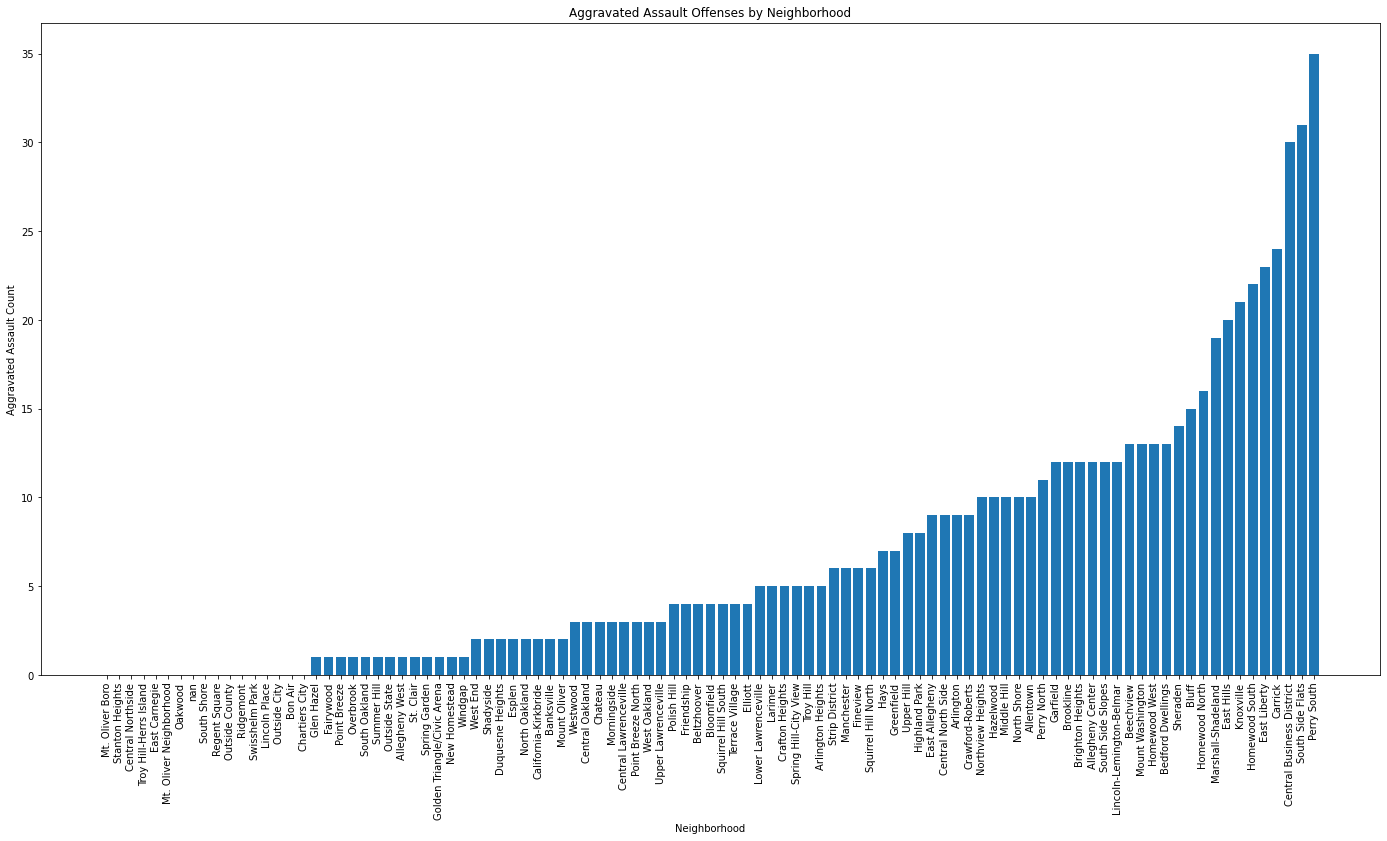

In [9]:
# Create a bar graph
plt.figure(figsize=(24, 12))
plt.bar(offense_data['Neighborhood'].astype(str), offense_data['Aggravated Assault Count'])
plt.xlabel('Neighborhood')
plt.ylabel('Aggravated Assault Count')
plt.title('Aggravated Assault Offenses by Neighborhood')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

# Simple Assault Count
Since aggravated assault is common but what is more common than it is, simple assault, I created a data table based on the number of simple assault counts. Based on the table, Mt. Oliver Boro,Troy Hill-Herrs Island, Outside State, and Mt.Oliver Neighborhodd is the neighborhoods with least amount of simple assaults. 

On the other side, Mount Washington, Brookline, Southside Side Flats, Central Business Districtt, and Carrick are the neighborhoods with the most amount of simple assault counts.

As seen by both assault counts, Mt. Oliver Boro and Troy Hill - Herrs Island has the least amount of assault counts.

In [10]:
assault_data = crime_data.loc[crime_data['OFFENSES'] == 'Simple Assault', 'INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
assault_data.columns = ['Neighborhood', 'Simple Assault Count']
simple_assault_row = pd.DataFrame({'Neighborhood': crime_data['INCIDENTNEIGHBORHOOD'].unique()})
simple_assault_row['Simple Assault Count'] = simple_assault_row['Neighborhood'].apply(lambda neighborhood: crime_data.loc[(crime_data['OFFENSES'] == '2701 Simple Assault.') & (crime_data['INCIDENTNEIGHBORHOOD'] == neighborhood)].shape[0])

# Concatenate the DataFrames
assault_data = pd.concat([assault_data, simple_assault_row], ignore_index=True)

assault_data = assault_data.sort_values(by='Simple Assault Count', ascending=True)

# Display the result
assault_data.head(1000)

,Neighborhood,Simple Assault Count
98,Mt. Oliver Boro,0
27,Troy Hill-Herrs Island,0
9,NaN,0
91,Outside State,0
83,Mt. Oliver Neighborhood,0
...,...,...
55,Mount Washington,135
6,Brookline,143
13,South Side Flats,144
87,Central Business District,205


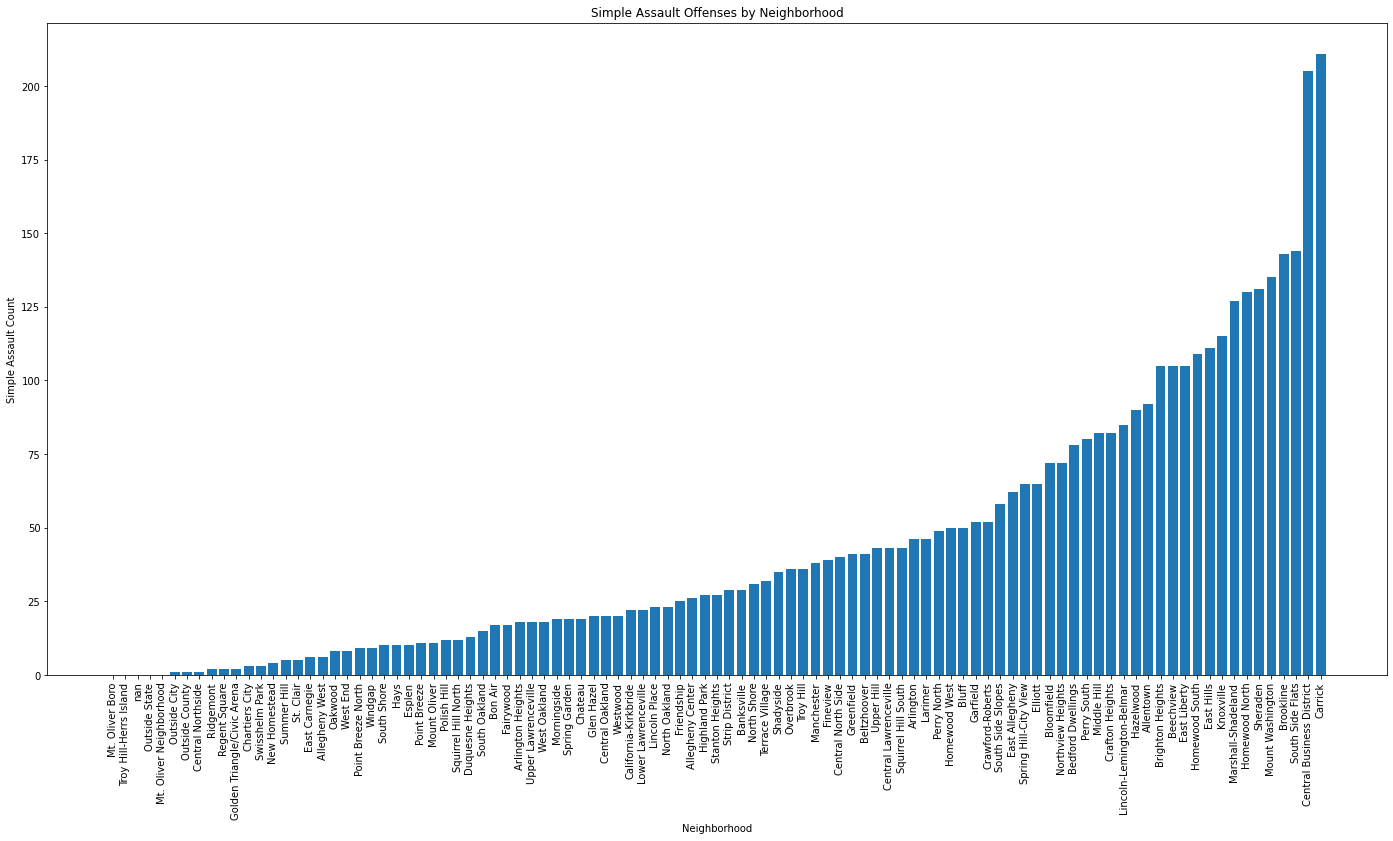

In [15]:
plt.figure(figsize=(24, 12))
plt.bar(assault_data['Neighborhood'].astype(str), assault_data['Simple Assault Count'])
plt.xlabel('Neighborhood')
plt.ylabel('Simple Assault Count')
plt.title('Simple Assault Offenses by Neighborhood')
plt.xticks(rotation= 90)  # Rotate x-axis labels for better visibility
plt.show()

# Robberies in Neighborhoods

While also going house hunting, it is important to make sure that valuables stored in the house are safely secured and nothing can be possibly stolen. While it is also important to understand houses can get robbed regardless of where a person lives, I created a table and pie chart to indicate which neighborhoods are more and less likely to get robbed. Although it is not a clear indication that these robberies occurred in houses, living in a prodominantely safer community would be the better option.

From the results of the table and the pie chart, it is a clear indication that Central Business District is not exactly the safest place to live in with the percentage of 14.7% likeliness to get robbed. Whereas, Mt. Oliver Boro is again, another safe neighborhood to live in.

In [16]:
robbery_data = crime_data.loc[crime_data['OFFENSES'] == 'Robbery', 'INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
robbery_data.columns = ['Neighborhood', 'Robbery Count']
robbery_row = pd.DataFrame({'Neighborhood': crime_data['INCIDENTNEIGHBORHOOD'].unique()})
robbery_row['Robbery Count'] = robbery_row['Neighborhood'].apply(lambda neighborhood: crime_data.loc[(crime_data['OFFENSES'] == '3701 Robbery.') & (crime_data['INCIDENTNEIGHBORHOOD'] == neighborhood)].shape[0])

# Concatenate the DataFrames
robbery_data = pd.concat([robbery_data, robbery_row], ignore_index=True)

robbery_data = robbery_data.sort_values(by='Robbery Count', ascending=True)

# Display the result
robbery_data.head(1000)

,Neighborhood,Robbery Count
98,Mt. Oliver Boro,0
78,Allegheny West,0
26,Central Northside,0
73,Oakwood,0
70,Friendship,0
...,...,...
3,East Allegheny,9
8,East Liberty,10
13,South Side Flats,13
11,Carrick,15


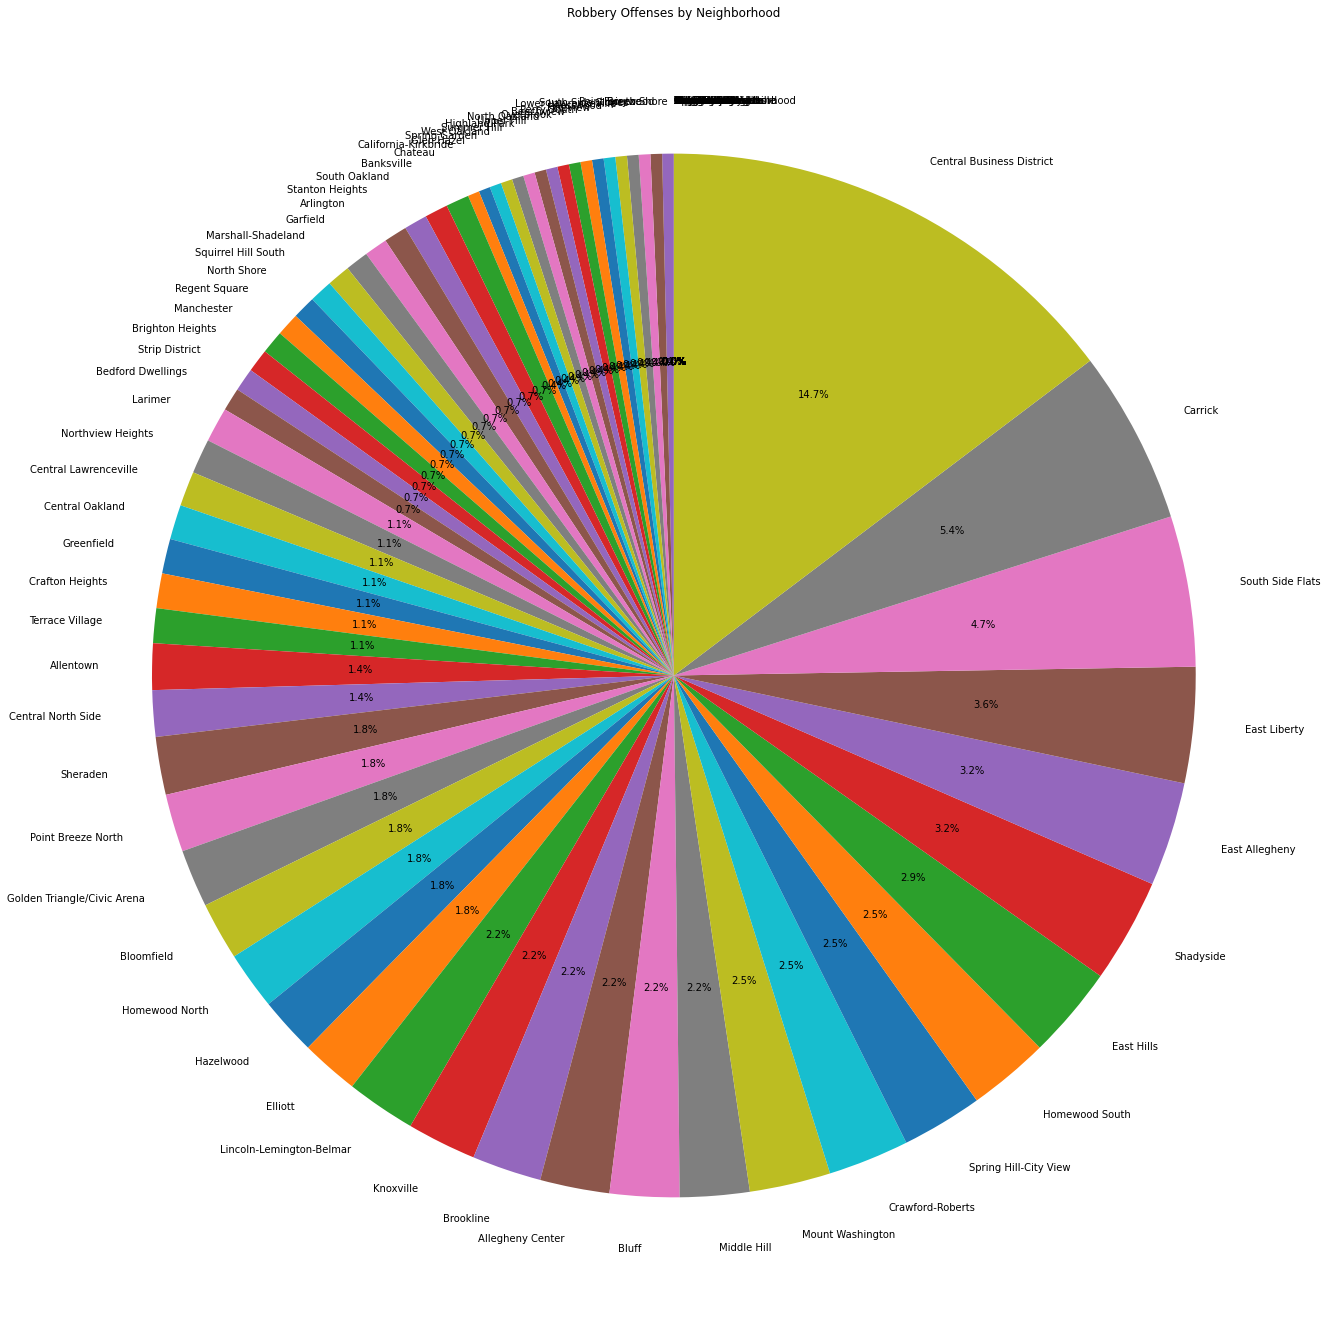

In [17]:
plt.figure(figsize=(24, 24))  # Adjust the width and height as needed

# Create a pie chart
plt.pie(robbery_data['Robbery Count'], labels=robbery_data['Neighborhood'], autopct='%1.1f%%', startangle=90)
plt.title('Robbery Offenses by Neighborhood')
plt.show(1000)

# Conclusion
In conclusion, out of all three of the many offenses that were filed in, Mt. Oliver Boro is the safest neighborhood to live in considering it is one of the top neighborhoods that have little to none offenses of aggravated and/or simple assault and with the least amount of robberies.